# Перцептрон Розенблатта
```
import numpy as np


class Perceptron(object):
    """
    Классификация на основе перцептрона.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Обучение.
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """
        Вычисление общего входа.
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """
        Возврашает метку класса после одной итерации
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```

Перцептрон Розенблатта:
* инициализация весов небольшими случайными значениями
* для каждого обучающего образца $x^{(i)}$
	* вычислить выходное значение $\check{y}$
	* обновить веса.

* $w_j$ = $w_j$+$\Delta$ $w_j$

* $\Delta$ $w_j$=$\eta$($y^{(i)}$-$\check{y}^{(i)}$)*$x^{(i)}_j$

где 
* $\eta$ скорость обучения( константа 0.0 - 1.0)
* ${y}^{(i)}$ метка класса i
* $\check{y}^{(i)}$ спрогнозированная метка класса


In [113]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from perceptron import Perceptron

In [114]:
iris = load_iris()


In [115]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [116]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [118]:
y = iris.target
X = df_iris

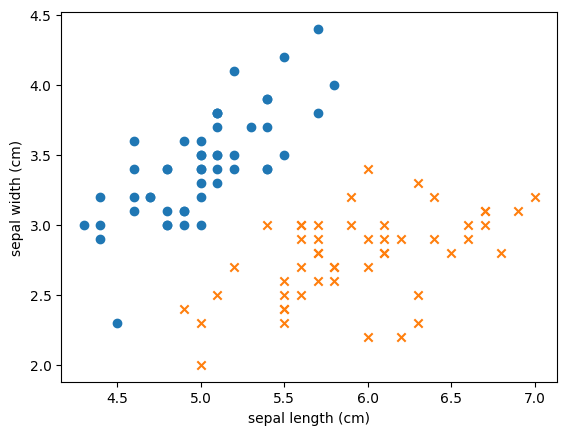

In [119]:
plt.scatter(X[:50]['sepal length (cm)'].values,X[:50]['sepal width (cm)'].values)
plt.scatter(X[50:100]['sepal length (cm)'].values,X[50:100]['sepal width (cm)'].values, marker='x')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show();

In [140]:
X = X[:100][['petal length (cm)','sepal width (cm)']].values
y = y[:100]

In [148]:
model_perceptrom = Perceptron(eta=0.01, n_iter=10)
model_perceptrom.fit(X,y)

In [149]:
model_perceptrom.errors_

[50, 51, 50, 50, 50, 50, 50, 50, 50, 50]